In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('food_waste_behavior_1000.csv')

In [6]:
data

,age,household_size,monthly_income,meals_planned,meals_purchased,food_waste
0,44,3,8144,27,39,18
1,69,2,3158,28,26,29
2,46,4,7816,17,68,19
3,37,4,7470,11,19,6
4,42,3,8283,12,27,28
...,...,...,...,...,...,...
995,24,3,8749,19,40,14
996,47,4,7571,1,37,45
997,36,5,2964,16,69,45
998,66,4,6224,11,12,21


In [5]:
data.head()

,age,household_size,monthly_income,meals_planned,meals_purchased,food_waste
0,44,3,8144,27,39,18
1,69,2,3158,28,26,29
2,46,4,7816,17,68,19
3,37,4,7470,11,19,6
4,42,3,8283,12,27,28


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              1000 non-null   int64
 1   household_size   1000 non-null   int64
 2   monthly_income   1000 non-null   int64
 3   meals_planned    1000 non-null   int64
 4   meals_purchased  1000 non-null   int64
 5   food_waste       1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


In [9]:
print(data.isnull().sum())

data = data.dropna()

X = data.drop('food_waste', axis=1)
y = data['food_waste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

age                0
household_size     0
monthly_income     0
meals_planned      0
meals_purchased    0
food_waste         0
dtype: int64


In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 11.7055
RMSE: 13.64977417395614


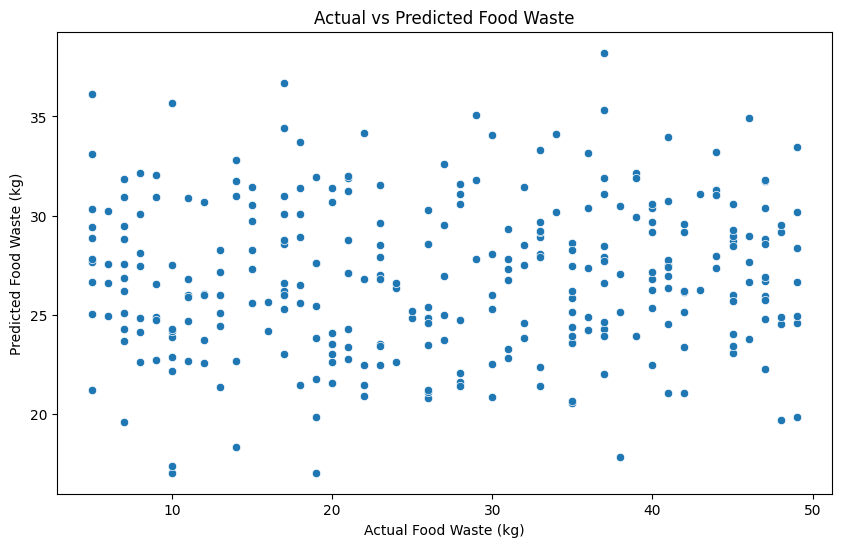

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Food Waste')
plt.xlabel('Actual Food Waste (kg)')
plt.ylabel('Predicted Food Waste (kg)')
plt.show()

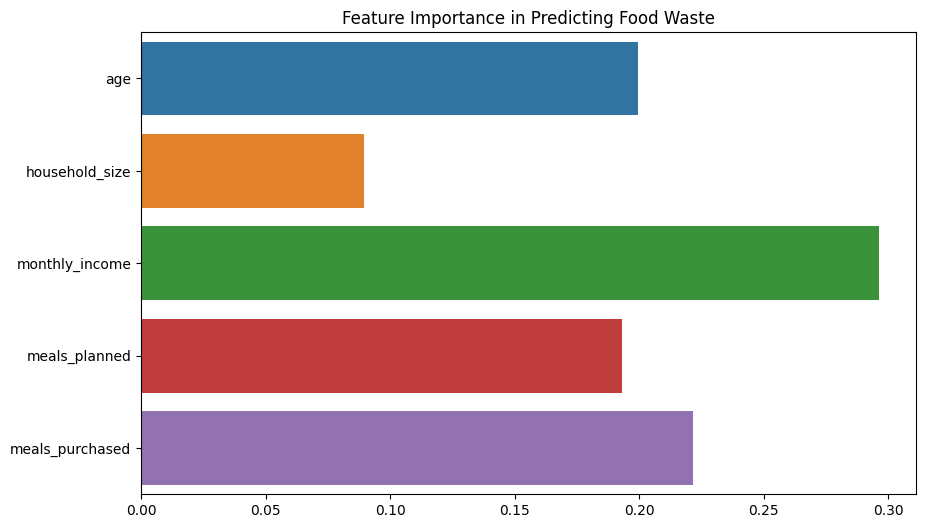

In [13]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Predicting Food Waste')
plt.show()